### Imports

Import dependencies and make a couple helper functions

In [21]:
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import sys

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 12]

from wand import * #import the module here, so that it can be reloaded.

RESOLUTION = (1920,1440,3)

def captureImage(fname):
    img = cv2.imread(fname)
    if img.shape[:2] != RESOLUTION[:2]:
        img = cv2.resize(img,RESOLUTION[:2])
    return img

def drawImage(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Detection Masks

Introspect and edit detection masks and thresholds

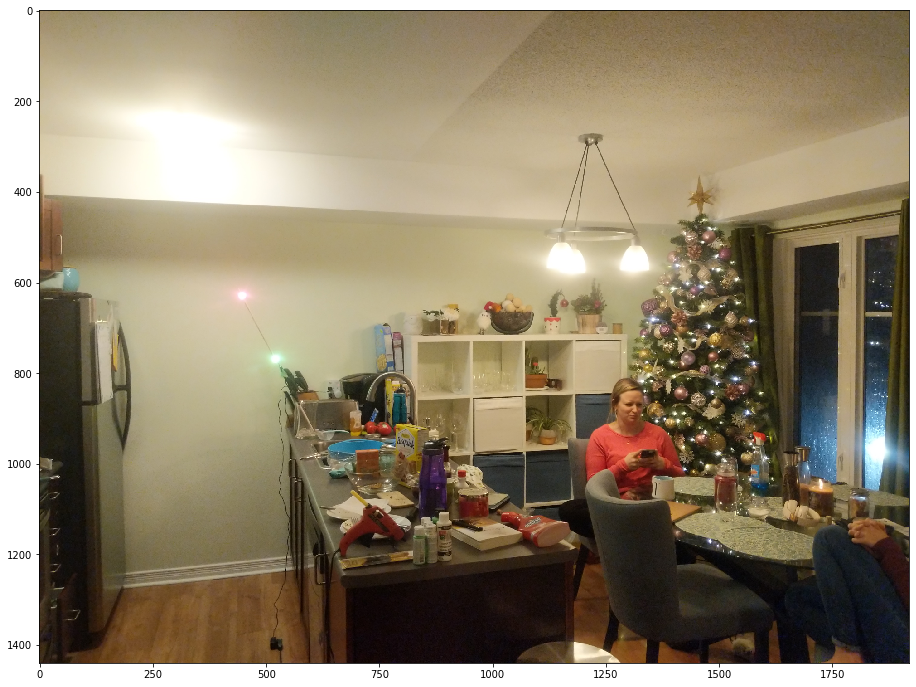

error: OpenCV(4.1.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::SizePolicy::NONE>::CvtHelper(InputArray, OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::SizePolicy::NONE]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [36]:
img = captureImage('wand_test.jpg')

topMarker = ActiveBallMarker(hue=345, hue_range=35,
    u_sat=0.2, m_sat=0.04, l_sat=0, u_bright=1, m_bright=0.96, l_bright=0.85)
bottomMarker = ActiveBallMarker(hue=120, hue_range=40,
    u_sat=0.2, m_sat=0.04, l_sat=0, u_bright=1, m_bright=0.96, l_bright=0.85)

top_mask = topMarker.visualizeMask(img)
bottom_mask = bottomMarker.visualizeMask(img)
drawImage(img)
drawImage(top_mask)
drawImage(bottom_mask)

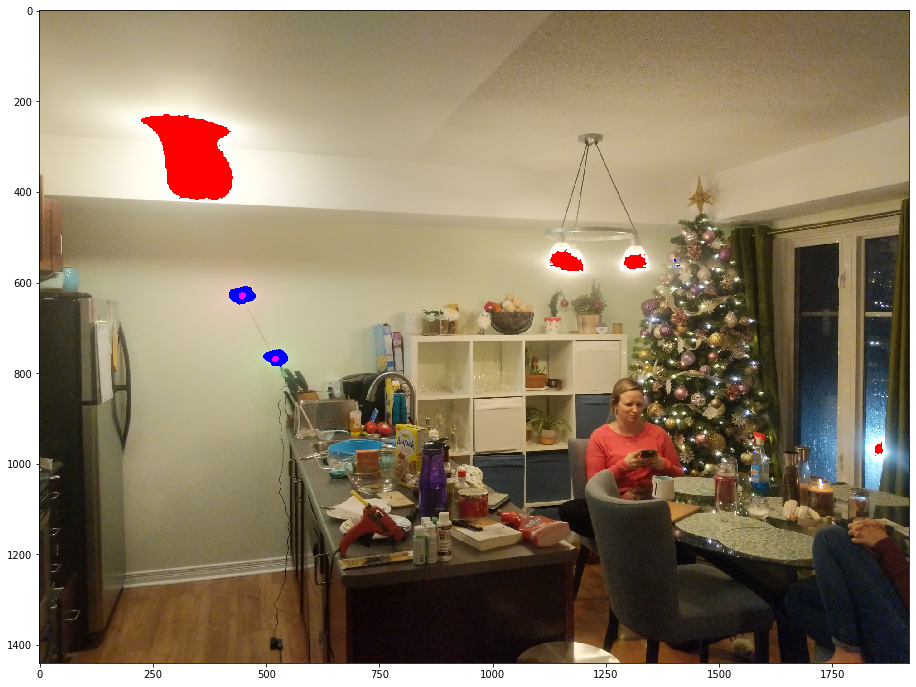

In [42]:
img = captureImage('wand_test.jpg')
wand = BallWand()
wand.visualizeMask(img)
drawImage(img)

### Verify

Test the final detector

In [22]:
img = captureImage('test4.jpg')

wand = BallWand(0.4)
keypoints = wand.detect(img)
wand.draw(img,keypoints)

drawImage(img)

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
wand.getMask